In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("~/Financial Fraud Detection/Fraud.csv")

df.head()




,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.sample(n=10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5259970,372,TRANSFER,6037883.90,C1049675955,0.00,0.00,C1271221840,6874397.63,12912281.53,0,0
5004596,353,PAYMENT,27086.36,C888985484,240205.00,213118.64,M1323274881,0.00,0.00,0,0
1953190,178,PAYMENT,6797.53,C318107240,305443.67,298646.14,M1428411822,0.00,0.00,0,0
1306356,136,CASH_IN,94832.82,C1687861998,277946.23,372779.05,C91865419,1076112.87,981280.05,0,0
1334958,137,CASH_IN,197356.36,C973450068,88361.00,285717.36,C293095142,0.00,0.00,0,0
4995339,352,DEBIT,427.67,C688413959,204062.00,203634.33,C816074126,89243.35,89671.02,0,0
5918546,404,CASH_OUT,67086.31,C709504264,0.00,0.00,C1397567898,189154.77,256241.08,0,0
6216477,589,CASH_OUT,186654.57,C1668310956,0.00,0.00,C1416309003,390399.60,577054.18,0,0
4074311,301,CASH_OUT,505896.61,C796898366,0.00,0.00,C1726020707,602271.50,1108168.12,0,0
5251800,371,CASH_IN,137430.00,C403037797,981743.90,1119173.90,C378480882,145079.59,7649.59,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data Quality Checks

In [9]:
# Missing Values checking 
df.isnull().sum()
# No null values Present here

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
# Checking for Duplicate rows 
duplicates = df.duplicated().sum()
if duplicates > 0 :
    df = df.drop_duplicates()


I think there is no duplicate values so the above block of code have run successfully without giving any result or if there would be any it will be dropped

In [13]:
# Negative values/ Invalid values 
(df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']] < 0).sum()


amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64

# Header Cleaning or Column Checks

In [14]:
print(df.columns.tolist())

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [15]:
# Column renaming with clear Understanding of each columns
df.rename(columns={
    'step': 'Time_step(Hr)',
    'type': 'Transaction_type',
    'amount': 'Transaction_amount',
    'nameOrig': 'Sender_ID',
    'oldbalanceOrg': 'Sender_old_balance',
    'newbalanceOrig': 'Sender_new_balance',
    'nameDest': 'Receiver_ID',
    'oldbalanceDest': 'Receiver_old_balance',
    'newbalanceDest': 'Receiver_new_balance',
    'isFraud': 'Is_fraud',
    'isFlaggedFraud': 'Is_flagged_fraud'
}, inplace=True)


In [17]:
# column names after renaming it properly
print(df.columns.tolist())

['Time_step(Hr)', 'Transaction_type', 'Transaction_amount', 'Sender_ID', 'Sender_old_balance', 'Sender_new_balance', 'Receiver_ID', 'Receiver_old_balance', 'Receiver_new_balance', 'Is_fraud', 'Is_flagged_fraud']


“I standardised column names using snake_case to improve readability, maintainability. ”

# Logical Consistency Checks 

In [20]:
df['orig_balance_diff'] = df['Sender_old_balance'] - df['Sender_new_balance']
df['dest_balance_diff'] = df['Receiver_new_balance'] - df['Receiver_old_balance']

df[['orig_balance_diff','dest_balance_diff']].describe()


,orig_balance_diff,dest_balance_diff
count,6.362620e+06,6.362620e+06
mean,-2.123056e+04,1.242947e+05
std,1.466433e+05,8.129391e+05
min,-1.915268e+06,-1.306083e+07
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.015044e+04,1.491054e+05
max,1.000000e+07,1.056878e+08


## Insightful Facts after this :- 
- Here **orig_balance_diff has negative values (min = -1.9M)** means Sender balance has been increased post-transactions,This violates basic accounting logic and indicates data inconsistency or synthetic noise.
- In more than 50% of transactions, balance did not change, This is data quality noise, not an error
- Receiver balance decreasing after receiving money = illogical, suggesting either missing updates or simulation imperfections.
- Extreme balance changes exist, which are potential fraud signals or simulation outliers. As Max value gors upto 10M or 105M

In [23]:
df.rename(columns={
    'orig_balance_diff': 'Sender_Bal_Difference',
    'dest_balance_diff': 'Receiver_Bal_Difference',
}, inplace=True)

In [21]:
# Create inconsistency flags to for the Later-on Detection of Inconsistent Datasets 
df['Sender_balance_anomaly'] = (df['orig_balance_diff'] < 0).astype(int)
df['Receiver_balance_anomaly'] = (df['dest_balance_diff'] < 0).astype(int)


In [24]:
df.sample(n=10)

,Time_step(Hr),Transaction_type,Transaction_amount,Sender_ID,Sender_old_balance,Sender_new_balance,Receiver_ID,Receiver_old_balance,Receiver_new_balance,Is_fraud,Is_flagged_fraud,Sender_Bal_Difference,Receiver_Bal_Difference,Sender_balance_anomaly,Receiver_balance_anomaly
2324469,188,PAYMENT,2670.55,C1499546712,7572.00,4901.45,M2051942151,0.00,0.00,0,0,2670.55,0.00,0,0
2856226,227,PAYMENT,37827.17,C185420124,235049.44,197222.27,M822568243,0.00,0.00,0,0,37827.17,0.00,0,0
2711162,211,PAYMENT,6852.41,C2105792014,0.00,0.00,M1858092138,0.00,0.00,0,0,0.00,0.00,0,0
772422,39,PAYMENT,10380.86,C1125918771,0.00,0.00,M117994546,0.00,0.00,0,0,0.00,0.00,0,0
1596769,156,CASH_OUT,158645.60,C467921243,0.00,0.00,C1536990547,1895455.45,2054101.05,0,0,0.00,158645.60,0,0
1745588,161,CASH_OUT,53463.95,C1092255265,0.00,0.00,C104407121,855445.75,908909.69,0,0,0.00,53463.94,0,0
567731,23,CASH_IN,97407.31,C1656827951,4456253.87,4553661.18,C1139707197,215814.44,118407.14,0,0,-97407.31,-97407.30,1,1
600923,34,CASH_OUT,25183.71,C941641892,12412.00,0.00,C2048309888,0.00,25183.71,0,0,12412.00,25183.71,0,0
6021515,469,TRANSFER,1536439.49,C1122672097,27191.00,0.00,C918968605,1115632.25,2652071.74,0,0,27191.00,1536439.49,0,0
6164123,550,CASH_IN,133455.98,C2048917614,267184.75,400640.73,C2099284782,457603.88,324147.90,0,0,-133455.98,-133455.98,1,1


In [26]:
# Creating No change Flags for no difference in Sender's And Receiver's Bank Balance Even After transactions is done or mentioned in the Dataset
df['Sender_noBal_change'] = (df['Sender_Bal_Difference'] == 0).astype(int)
df['Receiver_noBal_change'] = (df['Receiver_Bal_Difference'] == 0).astype(int)
df.sample(n=10)

,Time_step(Hr),Transaction_type,Transaction_amount,Sender_ID,Sender_old_balance,Sender_new_balance,Receiver_ID,Receiver_old_balance,Receiver_new_balance,Is_fraud,Is_flagged_fraud,Sender_Bal_Difference,Receiver_Bal_Difference,Sender_balance_anomaly,Receiver_balance_anomaly,Sender_noBal_change,Receiver_noBal_change
3539866,260,CASH_OUT,49224.32,C564270715,0.00,0.00,C1487966013,151677.59,200901.90,0,0,0.00,49224.31,0,0,1,0
5354143,375,CASH_OUT,186042.62,C1964441667,65560.00,0.00,C875589670,2688.54,188731.16,0,0,65560.00,186042.62,0,0,0,0
704018,37,CASH_OUT,234119.29,C154847080,0.00,0.00,C589464091,692669.55,926788.83,0,0,0.00,234119.28,0,0,1,0
1938640,177,CASH_OUT,216669.16,C321260584,0.00,0.00,C1679714664,398089.14,614758.30,0,0,0.00,216669.16,0,0,1,0
4459051,323,PAYMENT,18317.70,C427504505,336766.00,318448.30,M834662200,0.00,0.00,0,0,18317.70,0.00,0,0,0,1
4645574,330,CASH_OUT,144454.82,C1227227455,3602.00,0.00,C1933360826,31384805.42,31529260.24,0,0,3602.00,144454.82,0,0,0,0
3491007,258,CASH_OUT,375213.92,C1154855544,106168.00,0.00,C1933459578,6985472.98,7360686.90,0,0,106168.00,375213.92,0,0,0,0
772955,39,CASH_IN,46696.74,C2060853961,20603761.43,20650458.17,C140572150,9708025.84,9661329.10,0,0,-46696.74,-46696.74,1,1,0,0
3021150,233,CASH_IN,68578.69,C1735733318,1291019.56,1359598.24,C1746719373,8329863.88,8261285.20,0,0,-68578.68,-68578.68,1,1,0,0
2622811,208,PAYMENT,88.55,C1183937557,0.00,0.00,M1240340558,0.00,0.00,0,0,0.00,0.00,0,0,1,1


- **Implemented logical consistency checks on sender and receiver balances** 
- **Identified and flagged anomalous transactions where balances violated accounting logic**
- **& retained them for further behavioural analysis instead of blindly removing them.**

## Outliers Detection 
**Using IQR Method to detect Extreme Spikes during Transactions which might me a Fraud Signal and help in monitoring Those Accounts to the Team**
We will do this by using Receiver'S transaction(Receiver's Balance Difference) instead of Sender's Balance difference because fraud patterns, abnormal money creation or laundering shows up more clearly on the receiver side than the sender side.

In [27]:
# Applying Qraritle method for extreme spike detection in SENDER'S Transaction
Q1 = df['Receiver_Bal_Difference'].quantile(0.25)
Q3 = df['Receiver_Bal_Difference'].quantile(0.75)
IQR = Q3 - Q1

upper_spike_threshold = Q3 + 3 * IQR   

# now Detecting the transactions which are higher than the Upper threshold Values
df['Extreme_Bal_Spikes'] = (df['Receiver_Bal_Difference'] > upper_spike_threshold).astype(int)

In [72]:
print(f"Total Number of Spikes Detected: {(df['Extreme_Bal_Spikes'] == 1).sum()}")
print(f"In percentage: {(df['Extreme_Bal_Spikes'] == 1).mean() * 100:.2f} %")
print(f"Whereas Total Is_fraud is Only: {(df['Is_fraud']== 1).sum()}")
print(f"But Total Is_flagged_fraud is Only: {(df['Is_flagged_fraud']== 1).sum()}")
# 4.6% of all transactions show abnormal post-balance spikes
# detecting ~292,000 suspicious cases, while the system only flagged 16.

Total Number of Spikes Detected: 292868
In percentage: 4.60 %
Whereas Total Is_fraud is Only: 8213
But Total Is_flagged_fraud is Only: 16


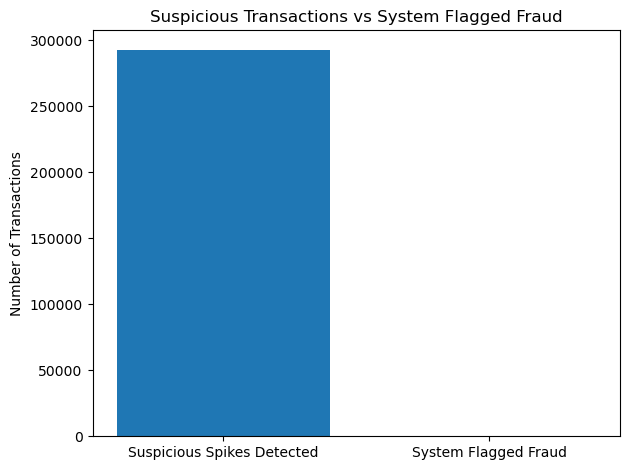

In [39]:
import matplotlib.pyplot as plt

suspicious_count = (df['Extreme_Bal_Spikes'] == 1).sum()
flagged_count = (df['Is_flagged_fraud'] == 1).sum()

labels = ['Suspicious Spikes Detected', 'System Flagged Fraud']
values = [suspicious_count, flagged_count]

plt.figure()
plt.bar(labels, values)

plt.title('Suspicious Transactions vs System Flagged Fraud')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



# Time Series Analysis 
- As the Transactional Data has been Detected Hourly for long time 

In [19]:
df['Time_step(Hr)'].describe()


count    6.362620e+06
mean     2.433972e+02
std      1.423320e+02
min      1.000000e+00
25%      1.560000e+02
50%      2.390000e+02
75%      3.350000e+02
max      7.430000e+02
Name: Time_step(Hr), dtype: float64

### Transaction Analysis Summary

- Each time step represents **1 hour**, and the maximum step is **743**, indicating that transactions were recorded over approximately **31 days** (743 ÷ 24 ≈ 30.96 days).
- The dataset contains **6,362,620 transactions (~6.36 million records)**, providing a large and robust sample for analysis.
- No **missing values** were found in the dataset, ensuring high data quality and reliability.
- The **mean (243)** and **median (239)** transaction times are very close, indicating a **fairly symmetric distribution**.
- **Quartile analysis** shows:
  - **25%** of transactions occurred within the first **156 hours (~6.5 days)**
  - **50%** of transactions occurred within **239 hours (~10 days)**
  - **75%** of transactions occurred within **335 hours (~14 days)**



### Now creating time buckets which will seperate weekly transactions for 4 weeks say 31 days

In [40]:
df['time_bucket'] = pd.cut(
    df['Time_step(Hr)'],
    bins=[0, 168, 336, 504, 743],
    labels=['Week1', 'Week2', 'Week3', 'Week4']
)


In [42]:
df.sample(n=10)

,Time_step(Hr),Transaction_type,Transaction_amount,Sender_ID,Sender_old_balance,Sender_new_balance,Receiver_ID,Receiver_old_balance,Receiver_new_balance,Is_fraud,Is_flagged_fraud,Sender_Bal_Difference,Receiver_Bal_Difference,Sender_balance_anomaly,Receiver_balance_anomaly,Sender_noBal_change,Receiver_noBal_change,Extreme_Bal_Spikes,time_bucket
2535840,205,CASH_IN,398285.91,C64967639,20946.00,419231.91,C1912599968,270962.06,0.00,0,0,-398285.91,-270962.06,1,1,0,0,0,Week2
2250060,187,TRANSFER,609596.60,C1568580539,142.00,0.00,C707383897,38.00,609634.60,0,0,142.00,609596.60,0,0,0,0,1,Week2
4423288,322,CASH_IN,57604.32,C1314485034,1157.00,58761.32,C1829796806,455745.32,398141.00,0,0,-57604.32,-57604.32,1,1,0,0,0,Week2
342053,16,CASH_OUT,653199.09,C869864972,0.00,0.00,C2114742437,2984733.45,5705720.94,0,0,0.00,2720987.49,0,0,1,0,1,Week1
4015395,299,CASH_OUT,195298.20,C1618287540,49721.00,0.00,C204540611,3861467.62,4056765.83,0,0,49721.00,195298.21,0,0,0,0,0,Week2
1195777,132,CASH_OUT,239901.76,C71864425,81901.00,0.00,C1504514479,100371.00,340272.76,0,0,81901.00,239901.76,0,0,0,0,0,Week1
3185842,239,TRANSFER,1982280.78,C1259677035,0.00,0.00,C47194675,2092880.84,4075161.62,0,0,0.00,1982280.78,0,0,1,0,1,Week2
472581,19,PAYMENT,6979.55,C1924742587,0.00,0.00,M2015753005,0.00,0.00,0,0,0.00,0.00,0,0,1,1,0,Week1
3954262,287,PAYMENT,31996.55,C1369480695,18634.91,0.00,M1010953134,0.00,0.00,0,0,18634.91,0.00,0,0,0,1,0,Week2
3105559,235,CASH_IN,133165.72,C72335138,4417337.61,4550503.33,C774678346,901374.83,768209.11,0,0,-133165.72,-133165.72,1,1,0,0,0,Week2


/var/folders/t1/q1fp1f1j67s7cmwpjmtcpnz40000gn/T/ipykernel_67958/4009939942.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_spikes = df.groupby('time_bucket')['Extreme_Bal_Spikes'].sum().sort_index()


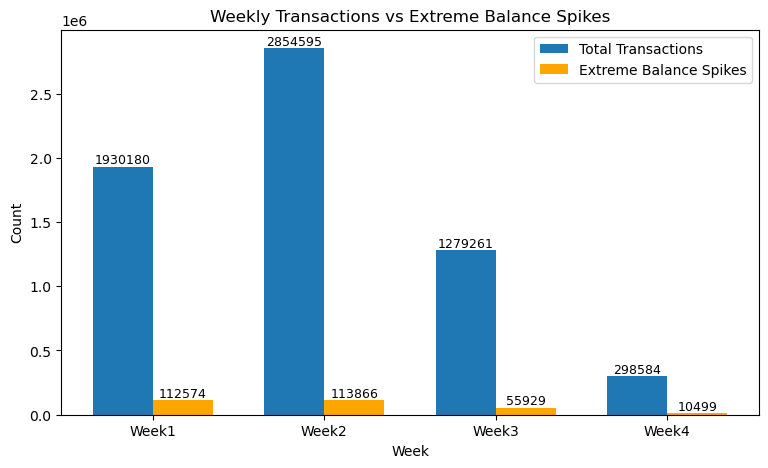

In [48]:
import numpy as np
import matplotlib.pyplot as plt

weekly_txn = df['time_bucket'].value_counts().sort_index()
weekly_spikes = df.groupby('time_bucket')['Extreme_Bal_Spikes'].sum().sort_index()

weeks = weekly_txn.index
x = np.arange(len(weeks))
width = 0.35

plt.figure(figsize=(9, 5))

# Total transactions bars
plt.bar(x - width/2, weekly_txn.values, width=width, label='Total Transactions')

# Extreme spikes bars (orange)
plt.bar(x + width/2, weekly_spikes.values, width=width, color='orange', label='Extreme Balance Spikes')

plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Weekly Transactions vs Extreme Balance Spikes')
plt.xticks(x, weeks)
plt.legend()

# Value labels
for i, v in enumerate(weekly_txn.values):
    plt.text(i - width/2, v, str(v), ha='center', va='bottom', fontsize=9)

for i, v in enumerate(weekly_spikes.values):
    plt.text(i + width/2, v, str(v), ha='center', va='bottom', fontsize=9)

plt.show()


In [58]:
print(df.groupby('time_bucket', observed=True)['Is_fraud'].sum())
print(df.groupby('time_bucket', observed=True)['Is_flagged_fraud'].sum())


time_bucket
Week1    1904
Week2    1863
Week3    1854
Week4    2592
Name: Is_fraud, dtype: int64
time_bucket
Week1     0
Week2     3
Week3     3
Week4    10
Name: Is_flagged_fraud, dtype: int64


### Weekly Fraud Transactions Analysis
- Fraud activity is persistent and slightly increasing over time, **1904 + 1863 + 1854 + 2592 = 8,213**
- Whereas System Flagged only **0 + 3 + 3 + 10 = 16** That is: **0.19% detection rate**
- This suggests:
**Static rule weakness**,
**No learning behaviour**,
**Delayed response** , **Need for Behavioural Detection**



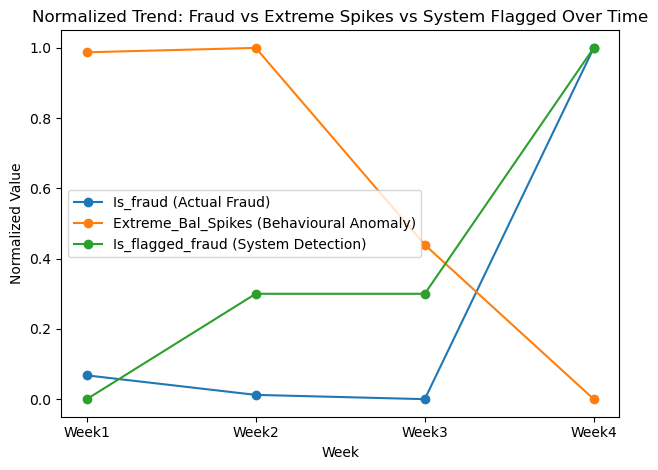

In [64]:
# Now plotting a graph which shows system flagged frauds per week.

# 1. Aggregate by week
fraud_by_week = df.groupby('time_bucket', observed=True)['Is_fraud'].sum()
spikes_by_week = df.groupby('time_bucket', observed=True)['Extreme_Bal_Spikes'].sum()
system_by_week = df.groupby('time_bucket', observed=True)['Is_flagged_fraud'].sum()

# 2. Normalize (Min-Max)
fraud_norm = (fraud_by_week - fraud_by_week.min()) / (fraud_by_week.max() - fraud_by_week.min())
spikes_norm = (spikes_by_week - spikes_by_week.min()) / (spikes_by_week.max() - spikes_by_week.min())
system_norm = (system_by_week - system_by_week.min()) / (system_by_week.max() - system_by_week.min())

# 3. Plot all three trends
plt.figure()

plt.plot(fraud_norm.index, fraud_norm.values, marker='o', label='Is_fraud (Actual Fraud)')
plt.plot(spikes_norm.index, spikes_norm.values, marker='o', label='Extreme_Bal_Spikes (Behavioural Anomaly)')
plt.plot(system_norm.index, system_norm.values, marker='o', label='Is_flagged_fraud (System Detection)')

plt.title('Normalized Trend: Fraud vs Extreme Spikes vs System Flagged Over Time')
plt.xlabel('Week')
plt.ylabel('Normalized Value')
plt.legend()
plt.tight_layout()
plt.show()



- Is_fraud (actual fraud) ~~ Normalised Value
- Extreme_Bal_Spikes (behavioural anomaly) ~~ Normalised Value
- Is_flagged_fraud (system detection)

# Payment Mode Analysis Used in Frauds

In [65]:
df.Transaction_type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: Transaction_type, Length: 6362620, dtype: object

In [67]:
df['Transaction_type'].value_counts()


Transaction_type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

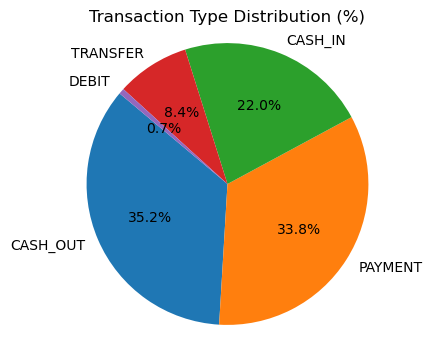

In [69]:
import matplotlib.pyplot as plt

# Data 
labels = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
sizes = [2237500, 2151495, 1399284, 532909, 41432]

plt.figure(figsize=(4, 4))

# show percentages
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',   
    startangle=140
)

plt.title('Transaction Type Distribution (%)')
plt.axis('equal')  # makes the pie a circle

plt.show()


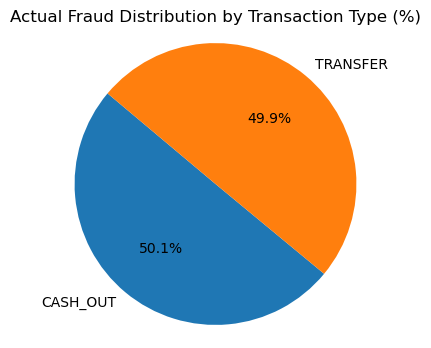

In [71]:
# Filter only actual fraud cases
fraud_df = df[df['Is_fraud'] == 1]

# Count frauds per transaction type
fraud_counts = fraud_df['Transaction_type'].value_counts()

plt.figure(figsize=(4, 4))

plt.pie(
    fraud_counts,
    labels=fraud_counts.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Actual Fraud Distribution by Transaction Type (%)')
plt.axis('equal')  # makes it a perfect circle

plt.show()

- Fraud is strictly concentrated in only two transaction modes – CASH_OUT and TRANSFER.
No fraud cases were observed in PAYMENT, CASH_IN, or DEBIT transactions.
- Out of 8,213 total confirmed fraud cases,
 **CASH_OUT accounts for ~50.1% of fraud incidents**
**TRANSFER accounts for ~49.9% of fraud incidents**
- This Pattern suggests systems should primarily focus on CASH_OUT and TRANSFER transactions to maximize detection efficiency

In [73]:
# Time Based Fraud Analysis over transaction type 
df.groupby(['time_bucket', 'Transaction_type'])['Is_fraud'].sum()


/var/folders/t1/q1fp1f1j67s7cmwpjmtcpnz40000gn/T/ipykernel_67958/2171888220.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['time_bucket', 'Transaction_type'])['Is_fraud'].sum()


time_bucket  Transaction_type
Week1        CASH_IN                0
             CASH_OUT             959
             DEBIT                  0
             PAYMENT                0
             TRANSFER             945
Week2        CASH_IN                0
             CASH_OUT             934
             DEBIT                  0
             PAYMENT                0
             TRANSFER             929
Week3        CASH_IN                0
             CASH_OUT             927
             DEBIT                  0
             PAYMENT                0
             TRANSFER             927
Week4        CASH_IN                0
             CASH_OUT            1296
             DEBIT                  0
             PAYMENT                0
             TRANSFER            1296
Name: Is_fraud, dtype: int64

In [75]:
fraud_modes = ['TRANSFER', 'CASH_OUT']
df_fraud_modes = df[df['Transaction_type'].isin(fraud_modes)]

fraud_time_mode = df_fraud_modes.groupby(
    ['time_bucket', 'Transaction_type'],
    observed=False
)['Is_fraud'].sum()

fraud_time_mode_unstacked = fraud_time_mode.unstack()
fraud_time_mode_unstacked


Transaction_type,CASH_OUT,TRANSFER
time_bucket,,
Week1,959,945
Week2,934,929
Week3,927,927
Week4,1296,1296


## Extreme Balance Spikes + Transaction Type + Time (weekly)
- Weekly distribution of Extreme_Bal_Spikes across Transaction Types

In [78]:

spike_time_mode = df.groupby(
    ['time_bucket', 'Transaction_type'],
    observed=False
)['Extreme_Bal_Spikes'].sum()

spike_time_mode_unstacked = spike_time_mode.unstack()
spike_time_mode_unstacked



Transaction_type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
time_bucket,,,,,
Week1,6652,36995,245,0,68682
Week2,973,12078,32,0,100783
Week3,289,4451,11,0,51178
Week4,9,1032,1,0,9457


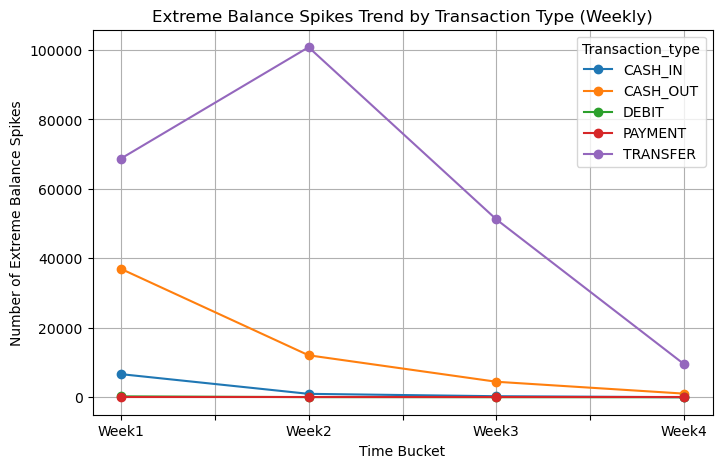

In [89]:
# Extreme Balance Spikes Trend

spike_time_mode_unstacked.plot(kind='line', marker='o', figsize=(8,5))


plt.title('Extreme Balance Spikes Trend by Transaction Type (Weekly)')
plt.xlabel('Time Bucket')
plt.ylabel('Number of Extreme Balance Spikes')
plt.grid(True)
plt.show()


- The weekly trend of balance spikes indicates potential staged fraud behavior, where abnormal balance changes precede or follow high-risk transactions.

### Combined Analysis : Now combine Fraud + Spikes: 
- this will tell you “How many fraud cases also had extreme balance spikes” Transactional type over Time Series(Weekly)

In [80]:
df['Fraud_and_Spike'] = ((df['Is_fraud'] == 1) & (df['Extreme_Bal_Spikes'] == 1)).astype(int)

fraud_spike_time = df.groupby(
    ['time_bucket', 'Transaction_type'],
    observed=False
)['Fraud_and_Spike'].sum().unstack()

fraud_spike_time


Transaction_type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
time_bucket,,,,,
Week1,0,401,0,0,6
Week2,0,401,0,0,1
Week3,0,427,0,0,0
Week4,0,561,0,0,0


## Meaningful Insights from Fraud+Spikes Analysis:
- CASH_OUT transactions following extreme balance spikes should be prioritized for real-time review and step-up authentication.
- Fraud occurs only in CASH_OUT & TRANSFER

### Now Taking cases of CASH_OUT only visualising Fraud Trend vs Fraud+Spike Trend (for CASH_OUT)

In [81]:
# Filtering only cash_out 
cashout_df = df[df['Transaction_type'] == 'CASH_OUT']

# Weekly fraud count for Cash_out 
cashout_fraud_trend = cashout_df.groupby(
    'time_bucket',
    observed=False
)['Is_fraud'].sum()

# Weekly Fraud + Spike Count (CASH_OUT)
cashout_fraud_spike_trend = cashout_df.groupby(
    'time_bucket',
    observed=False
)['Fraud_and_Spike'].sum()


In [82]:
# Combine for Plotting
trend_df = pd.DataFrame({
    'Fraud_CASH_OUT': cashout_fraud_trend,
    'Fraud_and_Spike_CASH_OUT': cashout_fraud_spike_trend
})

trend_df


,Fraud_CASH_OUT,Fraud_and_Spike_CASH_OUT
time_bucket,,
Week1,959,401
Week2,934,401
Week3,927,427
Week4,1296,561


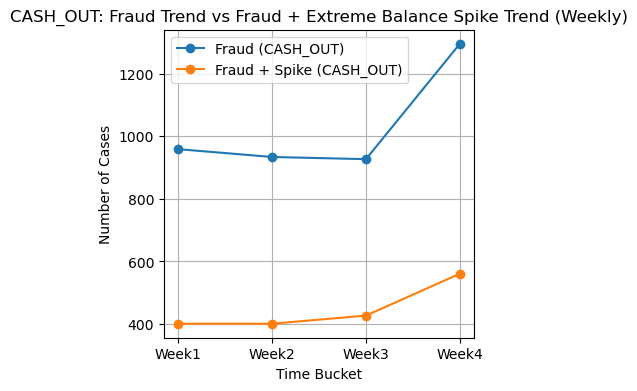

In [90]:
# Plotting – Overlay Line Chart

plt.figure(figsize=(4,4))

plt.plot(trend_df.index, trend_df['Fraud_CASH_OUT'], marker='o', label='Fraud (CASH_OUT)')
plt.plot(trend_df.index, trend_df['Fraud_and_Spike_CASH_OUT'], marker='o', label='Fraud + Spike (CASH_OUT)')

plt.title('CASH_OUT: Fraud Trend vs Fraud + Extreme Balance Spike Trend (Weekly)')
plt.xlabel('Time Bucket')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)

plt.show()


## Concluding from above chart (Weekly Analysis):
- Both total fraud cases and fraud+spike cases show a sharp increase **in Week 4**, suggesting escalation of fraudulent activity over time.
- extreme balance spikes are a common characteristic of **fraudulent CASH_OUT transactions**. this means, **Balance volatility is not random, it is behaviorally linked to fraud execution**
- CASH_OUT transactions should be treated as high-priority risk events

## System Flagged Fraud by Transaction Type

In [85]:
system_flag_by_type = df.groupby('Transaction_type')['Is_flagged_fraud'].sum()
print(system_flag_by_type)


Transaction_type
CASH_IN      0
CASH_OUT     0
DEBIT        0
PAYMENT      0
TRANSFER    16
Name: Is_flagged_fraud, dtype: int64


#### Therefore, System flagged only TRANSFER type transactions as fruad, Hence Improvement in Detection,  Authentication system is required.
### Extreme Balance Spikes by Transaction Type (Behavioural Signal)

In [86]:
spikes_by_type = df.groupby('Transaction_type')['Extreme_Bal_Spikes'].mean() * 100
print(spikes_by_type)


Transaction_type
CASH_IN      0.566218
CASH_OUT     2.438257
DEBIT        0.697528
PAYMENT      0.000000
TRANSFER    43.178104
Name: Extreme_Bal_Spikes, dtype: float64


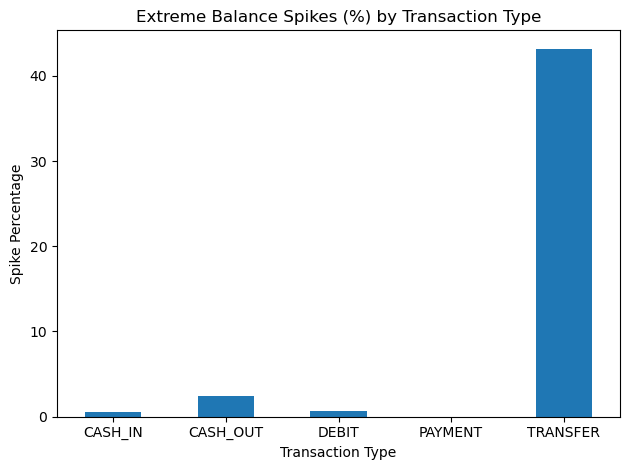

In [92]:
spikes_by_type.plot(kind='bar')


plt.title('Extreme Balance Spikes (%) by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Spike Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


| Transaction Type | Fraud Behaviour |
| ---------------- | --------------- |
| **TRANSFER**     | High fraud rate |
| **CASH_OUT**     | High fraud rate |
| **PAYMENT**      | Low fraud rate  |
| **DEBIT**        | Very low fraud  |

- **Risk Concentration** : TRANSFER and CASH_OUT transactions, while PAYMENT and DEBIT transactions exhibit minimal fraud activity.
- **System Weakness** : System-flagged fraud remains negligible across all transaction types, further highlighting the limitations of static rule-based detection.
- **Business Insight** : High-risk transaction types such as TRANSFER and CASH_OUT require stricter monitoring and enhanced anomaly detection controls.
